# Unsupervised Learning Project 

Context:                
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

Attribute Information:                       
● All the features are geometric features extracted from the silhouette.                
● All are numeric in nature. 

Objective:                       
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data. 

# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks) 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.impute import SimpleImputer
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [2]:
#loading data
df=pd.read_csv('vehicle.csv')

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
shape=df.shape  #Provides the Shape in (Rows, Columns) in the Data Frame df
print('shape of the data frame is =',shape)

shape of the data frame is = (846, 19)


In [5]:
#Column names
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

Attribute Information

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area ALONG MAJOR AXIS

SCALED VARIANCE (2nd order moment about major axis)/area ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 MAJOR AXIS

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3 MINOR AXIS

KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4 MINOR AXIS

KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4 MAJOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj2 is the variance along the major axis and sigma_min2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.



In [6]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
#Converting the Data type for the Categorical attributes from object to Category data type
df = df.astype({"class":'category'})

In [9]:
i = 0
#Length of the coulmns of the data fram
n=len(df.columns)
#List of all the attribues in the data frame 
List=list(df.columns.values)
print('Data type of each attribute of Data frame:\n')
while i < n:     
    New_List=List[i]
    Data_type=df[New_List].dtype
    print('Data Type of',New_List,'attribute is:',Data_type)
    i=i+1

Data type of each attribute of Data frame:

Data Type of compactness attribute is: int64
Data Type of circularity attribute is: float64
Data Type of distance_circularity attribute is: float64
Data Type of radius_ratio attribute is: float64
Data Type of pr.axis_aspect_ratio attribute is: float64
Data Type of max.length_aspect_ratio attribute is: int64
Data Type of scatter_ratio attribute is: float64
Data Type of elongatedness attribute is: float64
Data Type of pr.axis_rectangularity attribute is: float64
Data Type of max.length_rectangularity attribute is: int64
Data Type of scaled_variance attribute is: float64
Data Type of scaled_variance.1 attribute is: float64
Data Type of scaled_radius_of_gyration attribute is: float64
Data Type of scaled_radius_of_gyration.1 attribute is: float64
Data Type of skewness_about attribute is: float64
Data Type of skewness_about.1 attribute is: float64
Data Type of skewness_about.2 attribute is: float64
Data Type of hollows_ratio attribute is: int64
Dat

In [10]:
le = LabelEncoder() 
df['class'] = le.fit_transform(df['class'])
df['class']

0      2
1      2
2      1
3      2
4      0
      ..
841    1
842    2
843    1
844    1
845    2
Name: class, Length: 846, dtype: int32

In [11]:
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [13]:
print('Checking the presence of missing values in the Data frame:\n')
null_value_count = df.isnull().sum() 

i = 0

#Length of the coulmns of the data fram
n=len(df.columns)

#List of all the attribues in the data frame 
List=list(df.columns.values)

while i < n:   
    New_List=List[i]
    print('There are',null_value_count[i],'null values in',New_List,'attribute in the dataframe')

    i=i+1

Checking the presence of missing values in the Data frame:

There are 0 null values in compactness attribute in the dataframe
There are 5 null values in circularity attribute in the dataframe
There are 4 null values in distance_circularity attribute in the dataframe
There are 6 null values in radius_ratio attribute in the dataframe
There are 2 null values in pr.axis_aspect_ratio attribute in the dataframe
There are 0 null values in max.length_aspect_ratio attribute in the dataframe
There are 1 null values in scatter_ratio attribute in the dataframe
There are 1 null values in elongatedness attribute in the dataframe
There are 3 null values in pr.axis_rectangularity attribute in the dataframe
There are 0 null values in max.length_rectangularity attribute in the dataframe
There are 3 null values in scaled_variance attribute in the dataframe
There are 2 null values in scaled_variance.1 attribute in the dataframe
There are 2 null values in scaled_radius_of_gyration attribute in the datafram

There are few missing values in most of the attributes, we assume that these values are missed by random reason and replace the missing values with Median

In [14]:
#Stats of the dataframe
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [15]:
df=df.replace('', np.nan)

In [16]:
newdf=df.copy()
X = df.iloc[:,0:19] 
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe().T

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

We are adding a new dataframe newdf to store the value of df post missing values treatment

In [17]:
print('Checking the presence of missing values in the New Data frame:\n')
null_value_count = newdf.isnull().sum() 

i = 0

#Length of the coulmns of the data fram
n=len(newdf.columns)

#List of all the attribues in the data frame 
List=list(newdf.columns.values)

while i < n:   
    New_List=List[i]
    print('There are',null_value_count[i],'null values in',New_List,'attribute in the dataframe')

    i=i+1

Checking the presence of missing values in the New Data frame:

There are 0 null values in compactness attribute in the dataframe
There are 0 null values in circularity attribute in the dataframe
There are 0 null values in distance_circularity attribute in the dataframe
There are 0 null values in radius_ratio attribute in the dataframe
There are 0 null values in pr.axis_aspect_ratio attribute in the dataframe
There are 0 null values in max.length_aspect_ratio attribute in the dataframe
There are 0 null values in scatter_ratio attribute in the dataframe
There are 0 null values in elongatedness attribute in the dataframe
There are 0 null values in pr.axis_rectangularity attribute in the dataframe
There are 0 null values in max.length_rectangularity attribute in the dataframe
There are 0 null values in scaled_variance attribute in the dataframe
There are 0 null values in scaled_variance.1 attribute in the dataframe
There are 0 null values in scaled_radius_of_gyration attribute in the data

In [18]:
print('Measure of skewness of Quantitative Data in the New Dataframe newdf')
i = 0
List=list(newdf.columns.values)
n=len(List)
while i < n:   
    New_List=List[i]
    skew=newdf[New_List].skew(axis = 0, skipna = True)
    if (skew==0):
        conclusion='Data is normally distributed or Symmetric'
    elif(skew<0):
        conclusion='Data is Left-Skewed'
    else:
        conclusion='Data is Right-Skewed'     
    print('Skewness of',New_List,'is: %.3f'%skew,'and',conclusion)
    i=i+1

Measure of skewness of Quantitative Data in the New Dataframe newdf
Skewness of compactness is: 0.381 and Data is Right-Skewed
Skewness of circularity is: 0.265 and Data is Right-Skewed
Skewness of distance_circularity is: 0.109 and Data is Right-Skewed
Skewness of radius_ratio is: 0.398 and Data is Right-Skewed
Skewness of pr.axis_aspect_ratio is: 3.835 and Data is Right-Skewed
Skewness of max.length_aspect_ratio is: 6.778 and Data is Right-Skewed
Skewness of scatter_ratio is: 0.609 and Data is Right-Skewed
Skewness of elongatedness is: 0.047 and Data is Right-Skewed
Skewness of pr.axis_rectangularity is: 0.774 and Data is Right-Skewed
Skewness of max.length_rectangularity is: 0.256 and Data is Right-Skewed
Skewness of scaled_variance is: 0.656 and Data is Right-Skewed
Skewness of scaled_variance.1 is: 0.845 and Data is Right-Skewed
Skewness of scaled_radius_of_gyration is: 0.280 and Data is Right-Skewed
Skewness of scaled_radius_of_gyration.1 is: 2.090 and Data is Right-Skewed
Skewne

In [19]:
print('Checking the presence of outliers of Quantitative Data in the New Dataframe newdf')
i = 0
total_outliers=0
List=list(newdf.columns.values)
n=len(List)
while i < n:   
    New_List=List[i]
    minimum,q1,q3,maximum= np.percentile(newdf[New_List],[0,25,75,100])
    iqr=q3-q1
    lower_value=q1-(1.5 * iqr)
    upper_value=q3+(1.5 * iqr)
    if ((minimum<lower_value) or (maximum>upper_value)):
        outliers = [x for x in df[New_List] if x < lower_value or x > upper_value]
        print('Identified outliers for',New_List,'out of', len(newdf[New_List]),'records: %d' % len(outliers))       
        total_outliers=total_outliers+len(outliers)
    else:
        print('There is no outlier for the attribute',New_List)        
    i=i+1
print('Total number of outliers are:',total_outliers)

Checking the presence of outliers of Quantitative Data in the New Dataframe newdf
There is no outlier for the attribute compactness
There is no outlier for the attribute circularity
There is no outlier for the attribute distance_circularity
Identified outliers for radius_ratio out of 846 records: 3
Identified outliers for pr.axis_aspect_ratio out of 846 records: 8
Identified outliers for max.length_aspect_ratio out of 846 records: 13
There is no outlier for the attribute scatter_ratio
There is no outlier for the attribute elongatedness
There is no outlier for the attribute pr.axis_rectangularity
There is no outlier for the attribute max.length_rectangularity
Identified outliers for scaled_variance out of 846 records: 1
Identified outliers for scaled_variance.1 out of 846 records: 2
There is no outlier for the attribute scaled_radius_of_gyration
Identified outliers for scaled_radius_of_gyration.1 out of 846 records: 15
Identified outliers for skewness_about out of 846 records: 12
Identi

The below columns have outliers.

radius_ratio,
pr.axis_aspect_ratio,
max.length_aspect_ratio,
scaled_variance,
scaled_variance.1,
scaled_radius_of_gyration.1
skewness_about
skewness_about.1

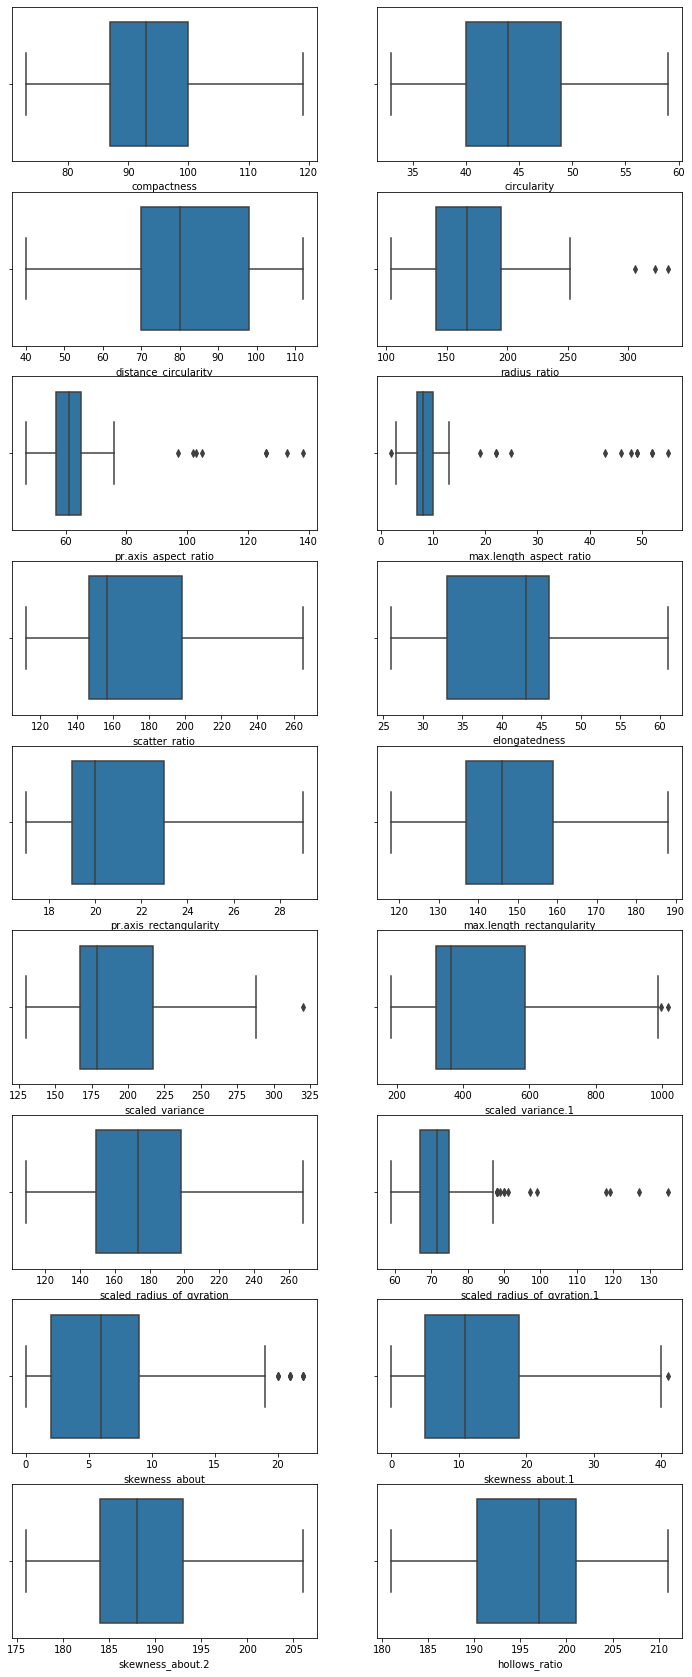

In [20]:
#Checking for the outliers using boxplot
i = 0
List=list(newdf.iloc[:,0:18].columns.values)
n=len(List)
plt.figure(figsize= (12,30))
while i<n: 
    New_List=List[i]
    plt.subplot(9,2,i+1)
    sns.boxplot(newdf[New_List])
    i=i+1 
plt.show()

Outlier Treatment using a new Data frame cleandf

In [21]:
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print('upper_value:\n',Q3+1.5*IQR)
print('\nLower value:\n',Q1-1.5*IQR)
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]

upper_value:
 compactness                    119.500
circularity                     62.500
distance_circularity           140.000
radius_ratio                   276.000
pr.axis_aspect_ratio            77.000
max.length_aspect_ratio         14.500
scatter_ratio                  274.500
elongatedness                   65.500
pr.axis_rectangularity          29.000
max.length_rectangularity      192.000
scaled_variance                292.000
scaled_variance.1              989.500
scaled_radius_of_gyration      271.500
scaled_radius_of_gyration.1     87.000
skewness_about                  19.500
skewness_about.1                40.000
skewness_about.2               206.500
hollows_ratio                  217.125
class                            2.500
dtype: float64

Lower value:
 compactness                     67.500
circularity                     26.500
distance_circularity            28.000
radius_ratio                    60.000
pr.axis_aspect_ratio            45.000
max.length_aspect_ra

In [22]:
cleandf

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
5          107.0         44.0                 106.0         172.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                     10.0          162.0   
1                    57.0                      9.0          149.0   
2                    66.0                     10.0          207.0   
3                    63.0                      9.0          144.0   
5                    50.0                      6.0          255.0   
..                    ...                      ...            ...   
841                  64.0                      8.0          169.0   
842                  66.0                     11.0          159.0   
843                  67.0                     12.0          222.0   
844                  58.0                      7.0          135.0   
845                  55.0                      5.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                      159.0   
1             45.0                    19.0                      143.0   
2             32.0                    23.0                      158.0   
3             46.0                    19.0                      143.0   
5             26.0                    28.0                      169.0   
..             ...                     ...                        ...   
841           40.0                    20.0                      134.0   
842           43.0                    20.0                      159.0   
843           30.0                    25.0                      173.0   
844           50.0                    18.0                      124.0   
845           56.0                    17.0                      128.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
5              280.0              957.0                      264.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
5                           85.0             5.0               9.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [23]:
print('Checking the presence of outliers of Quantitative Data in the clean Dataframe post outlier treatment')
i = 0
total_outliers=0
List=list(cleandf.columns.values)
n=len(List) 
while i < n:   
    New_List=List[i]
    minimum,q1,q3,maximum= np.percentile(cleandf[New_List],[0,25,75,100])
    iqr=q3-q1
    lower_value=q1-(1.5 * iqr)
    upper_value=q3+(1.5 * iqr)
    if ((minimum<lower_value) or (maximum>upper_value)):
        outliers = [x for x in cleandf[New_List] if x < lower_value or x > upper_value]
        print('Identified outliers for',New_List,'out of', len(cleandf[New_List]),'records: %d' % len(outliers))       
        total_outliers=total_outliers+len(outliers)
    else:
        print('There is no outlier for the attribute',New_List)        
    i=i+1
print('Total number of outliers are:',total_outliers)

Checking the presence of outliers of Quantitative Data in the clean Dataframe post outlier treatment
There is no outlier for the attribute compactness
There is no outlier for the attribute circularity
There is no outlier for the attribute distance_circularity
There is no outlier for the attribute radius_ratio
There is no outlier for the attribute pr.axis_aspect_ratio
There is no outlier for the attribute max.length_aspect_ratio
There is no outlier for the attribute scatter_ratio
There is no outlier for the attribute elongatedness
There is no outlier for the attribute pr.axis_rectangularity
There is no outlier for the attribute max.length_rectangularity
There is no outlier for the attribute scaled_variance
Identified outliers for scaled_variance.1 out of 813 records: 1
There is no outlier for the attribute scaled_radius_of_gyration
There is no outlier for the attribute scaled_radius_of_gyration.1
There is no outlier for the attribute skewness_about
There is no outlier for the attribute 

Most of the Outlier are removed, and the one outlier which is availabe in the scaled_variance.1 is from the previous data, which was not an outlier earlier and can be ignored

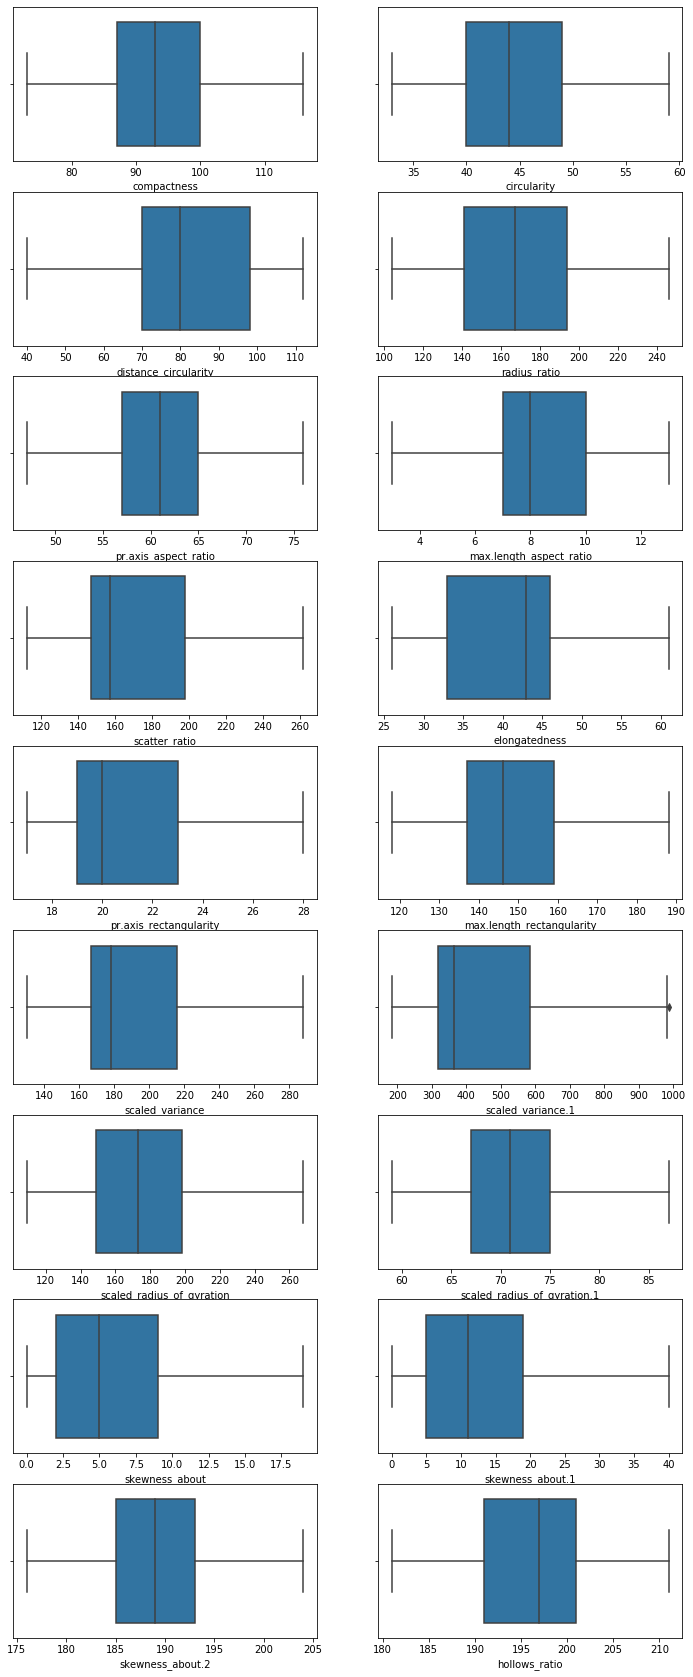

In [24]:
#Checking for the outliers in cleandf using boxplot
i = 0
List=list(cleandf.iloc[:,0:18].columns.values)
n=len(List)
plt.figure(figsize= (12,30))
while i<n: 
    New_List=List[i]
    plt.subplot(9,2,i+1)
    sns.boxplot(cleandf[New_List])
    i=i+1 
plt.show()

We can proceed with either the newdf with Outlier or the cleandf in which we have treated the outliers.
The outliers are very few and they are not so unrealistic. Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed and we will proceed with newdf.

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points) 

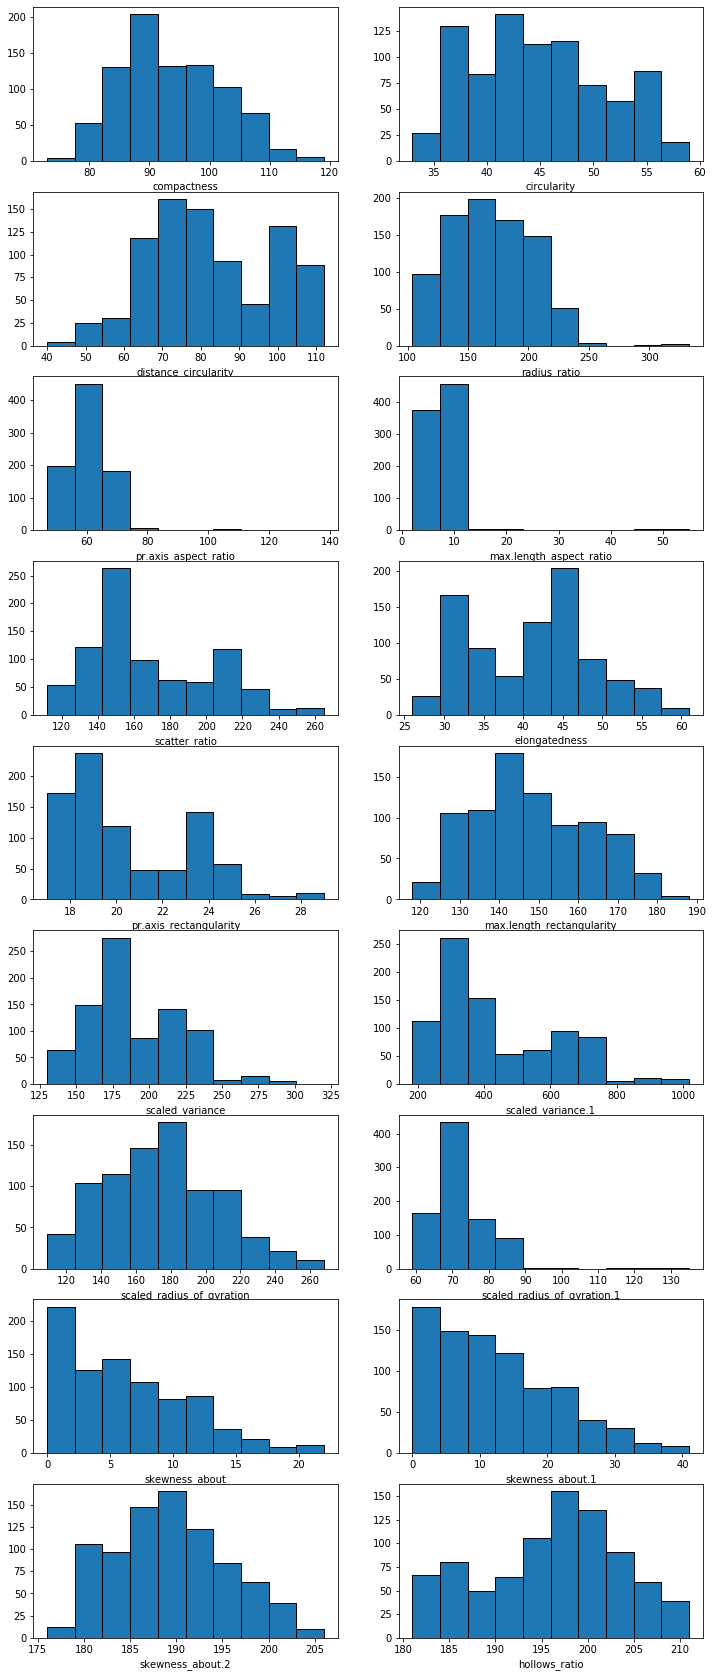

In [25]:
# Histogram Plot of Quantitative Data
i = 0
List=list(newdf.iloc[:,0:18].columns.values)
n=len(List)
plt.figure(figsize= (12,30))
while i<n: 
    New_List=List[i]
    plt.subplot(9,2,i+1)
    plt.hist(newdf[New_List],edgecolor = 'black')
    plt.xlabel(New_List)
    i=i+1
plt.show() 

Quick Observation :

Most of the data attributes seems to be normally distributed         
Few Many of the attributes are Right Skewed as mentioned earlier in skewness check.

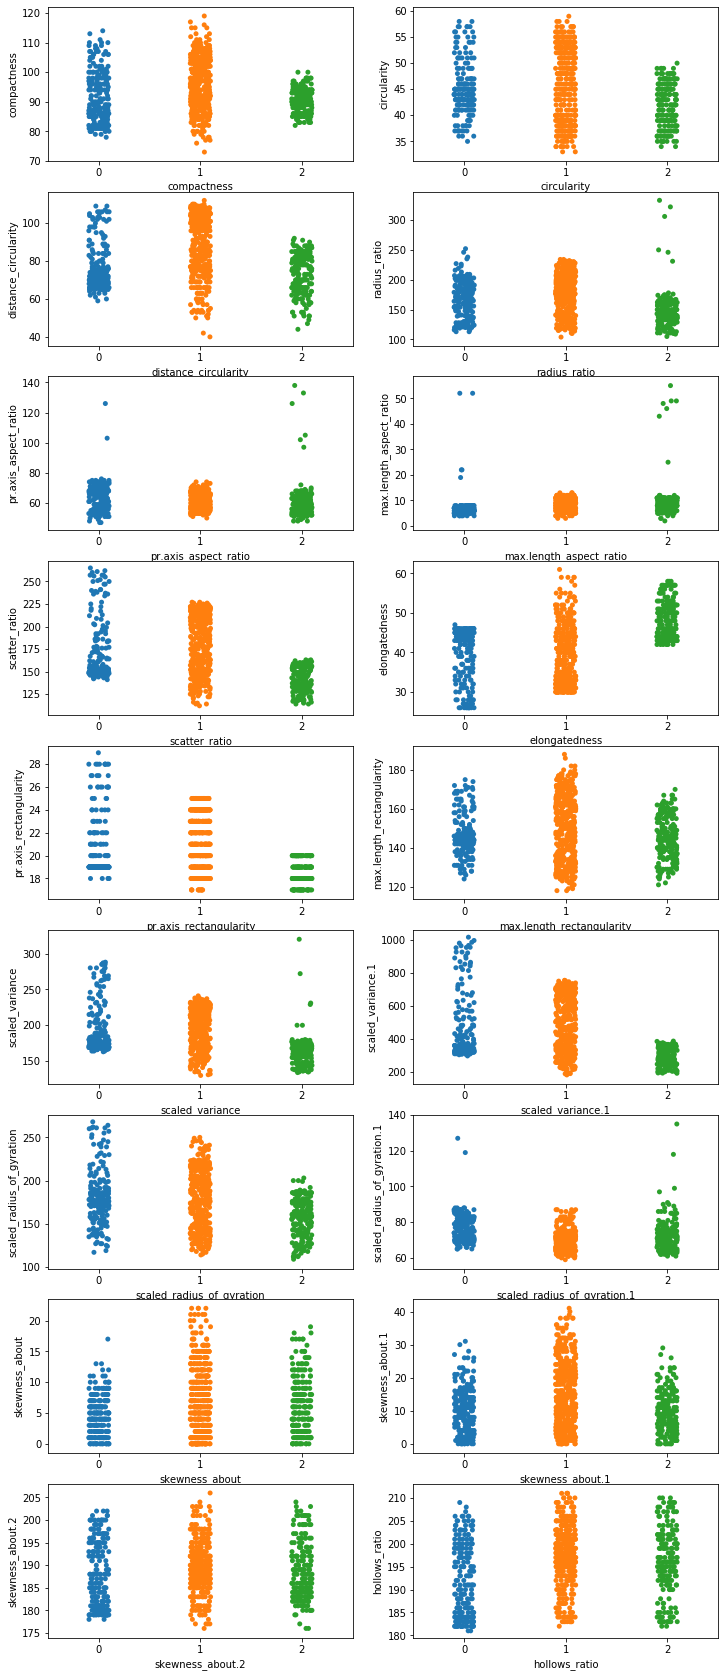

In [26]:
# Strip Plot of Quantitative Data
i = 0
List=list(newdf.iloc[:,0:18].columns.values)
n=len(List)
plt.figure(figsize= (12,30))
while i<n: 
    New_List=List[i]
    plt.subplot(9, 2, i+1)
    sns.stripplot(df['class'],df[New_List])    
    plt.xlabel(New_List)
    i=i+1
plt.show()

In [27]:
#We will use Pearson Correlation Coefficient to see what all attributes are linearly related 
newdf.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

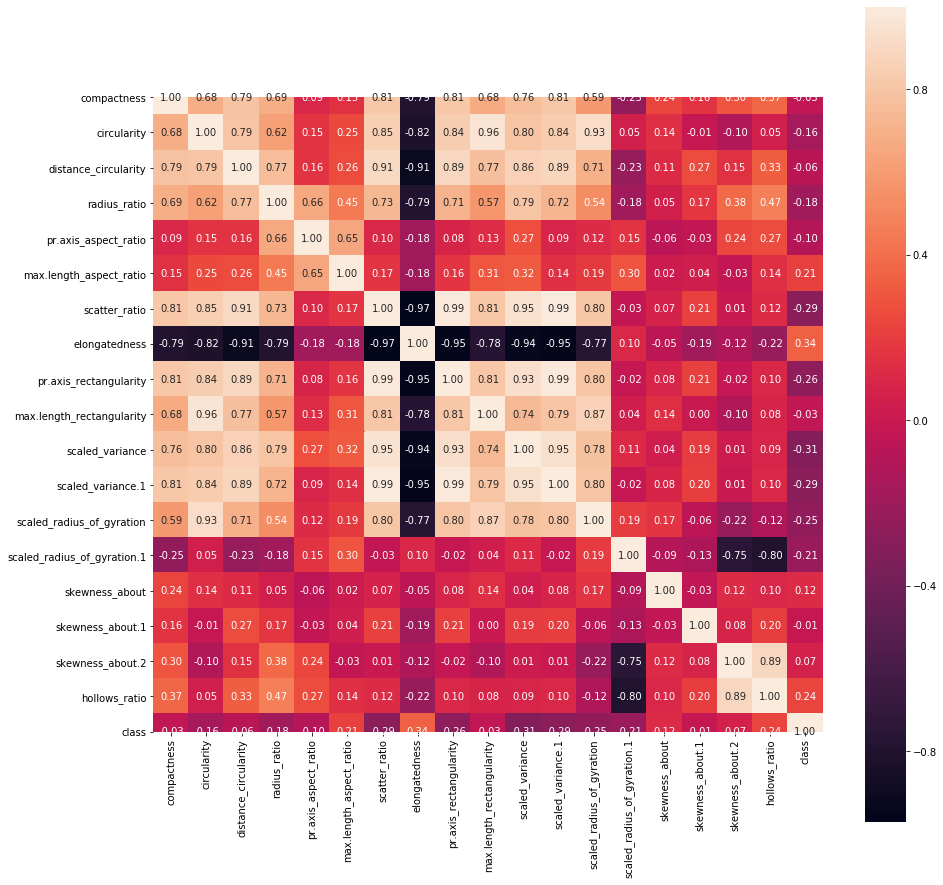

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(newdf.corr(),annot=True,square=True,fmt='.2f')
plt.show()

In [29]:
print('Insights From Correlation Heatmap:\n');
print('Attributes with high correlation of greater than 0.9 or less than 0.9:\n');
a=newdf.corr()
i = 0
j = 0
c = 0
n=len(a.columns)
col=list(a.columns.values)
ind=list(a.index.values)
while i < n:
    sInd=ind[i]
    while j < n:
        sCol=col[j]
        value=a.loc[sInd,sCol]
        if(((value>0.9) or (value<-0.9))&(sInd!=sCol)):
            print('Correlation between',sInd,'&',sCol,'is',a.loc[sInd,sCol])
        j=j+1
    c=c+1
    j = c
    i=i+1

Insights From Correlation Heatmap:

Attributes with high correlation of greater than 0.9 or less than 0.9:

Correlation between circularity & max.length_rectangularity is 0.9613180653243628
Correlation between circularity & scaled_radius_of_gyration is 0.9258160243502346
Correlation between distance_circularity & scatter_ratio is 0.9050757734130161
Correlation between distance_circularity & elongatedness is -0.91130693226804
Correlation between scatter_ratio & elongatedness is -0.9716008640363396
Correlation between scatter_ratio & pr.axis_rectangularity is 0.9897505102299368
Correlation between scatter_ratio & scaled_variance is 0.948662306793849
Correlation between scatter_ratio & scaled_variance.1 is 0.9930115357055442
Correlation between elongatedness & pr.axis_rectangularity is -0.9489958637861852
Correlation between elongatedness & scaled_variance is -0.9363818383742168
Correlation between elongatedness & scaled_variance.1 is -0.9538160951670767
Correlation between pr.axis_rectan

In [30]:
print('Insights From Correlation Heatmap:\n');
print('Attributes with low correlation of -0.3 TO 0.3:\n');
a=newdf.corr()
i = 0
c = 0
j = 0
n=len(a.columns)
col=list(a.columns.values)
ind=list(a.index.values)
while i < n:  
    sInd=ind[i]
    while j < n:
        sCol=col[j]
        value=a.loc[sInd,sCol]
        if((value<.3)&(sInd!=sCol)&(value>-0.3)):
            print('Correlation between',sInd,'&',sCol,'is',a.loc[sInd,sCol])
        j = j+1 
    c = c+1
    j = c
    i = i+1

Insights From Correlation Heatmap:

Attributes with low correlation of -0.3 TO 0.3:

Correlation between compactness & pr.axis_aspect_ratio is 0.09153432870639264
Correlation between compactness & max.length_aspect_ratio is 0.14824918609375565
Correlation between compactness & scaled_radius_of_gyration.1 is -0.24959256235551516
Correlation between compactness & skewness_about is 0.23607838250749777
Correlation between compactness & skewness_about.1 is 0.1570146241186882
Correlation between compactness & skewness_about.2 is 0.29853704522125996
Correlation between compactness & class is -0.033795598595698716
Correlation between circularity & pr.axis_aspect_ratio is 0.1537782392464515
Correlation between circularity & max.length_aspect_ratio is 0.2514667821406536
Correlation between circularity & scaled_radius_of_gyration.1 is 0.05194637831300446
Correlation between circularity & skewness_about is 0.14419763228132643
Correlation between circularity & skewness_about.1 is -0.011438581889718

If two features is highly correlated then there is no point using both features.in that case, we can drop one feature. SNS heatmap gives us the correlation matrix where we can see which features are highly correlated.

From above correlation matrix we can see that there are many features which are highly correlated. if we carefully analyse, we will find that many features are there which having more than 0.9 correlation. so we can decide to get rid of those columns whose correlation is +-0.9 or above.            

C:\Users\Krish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Krish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


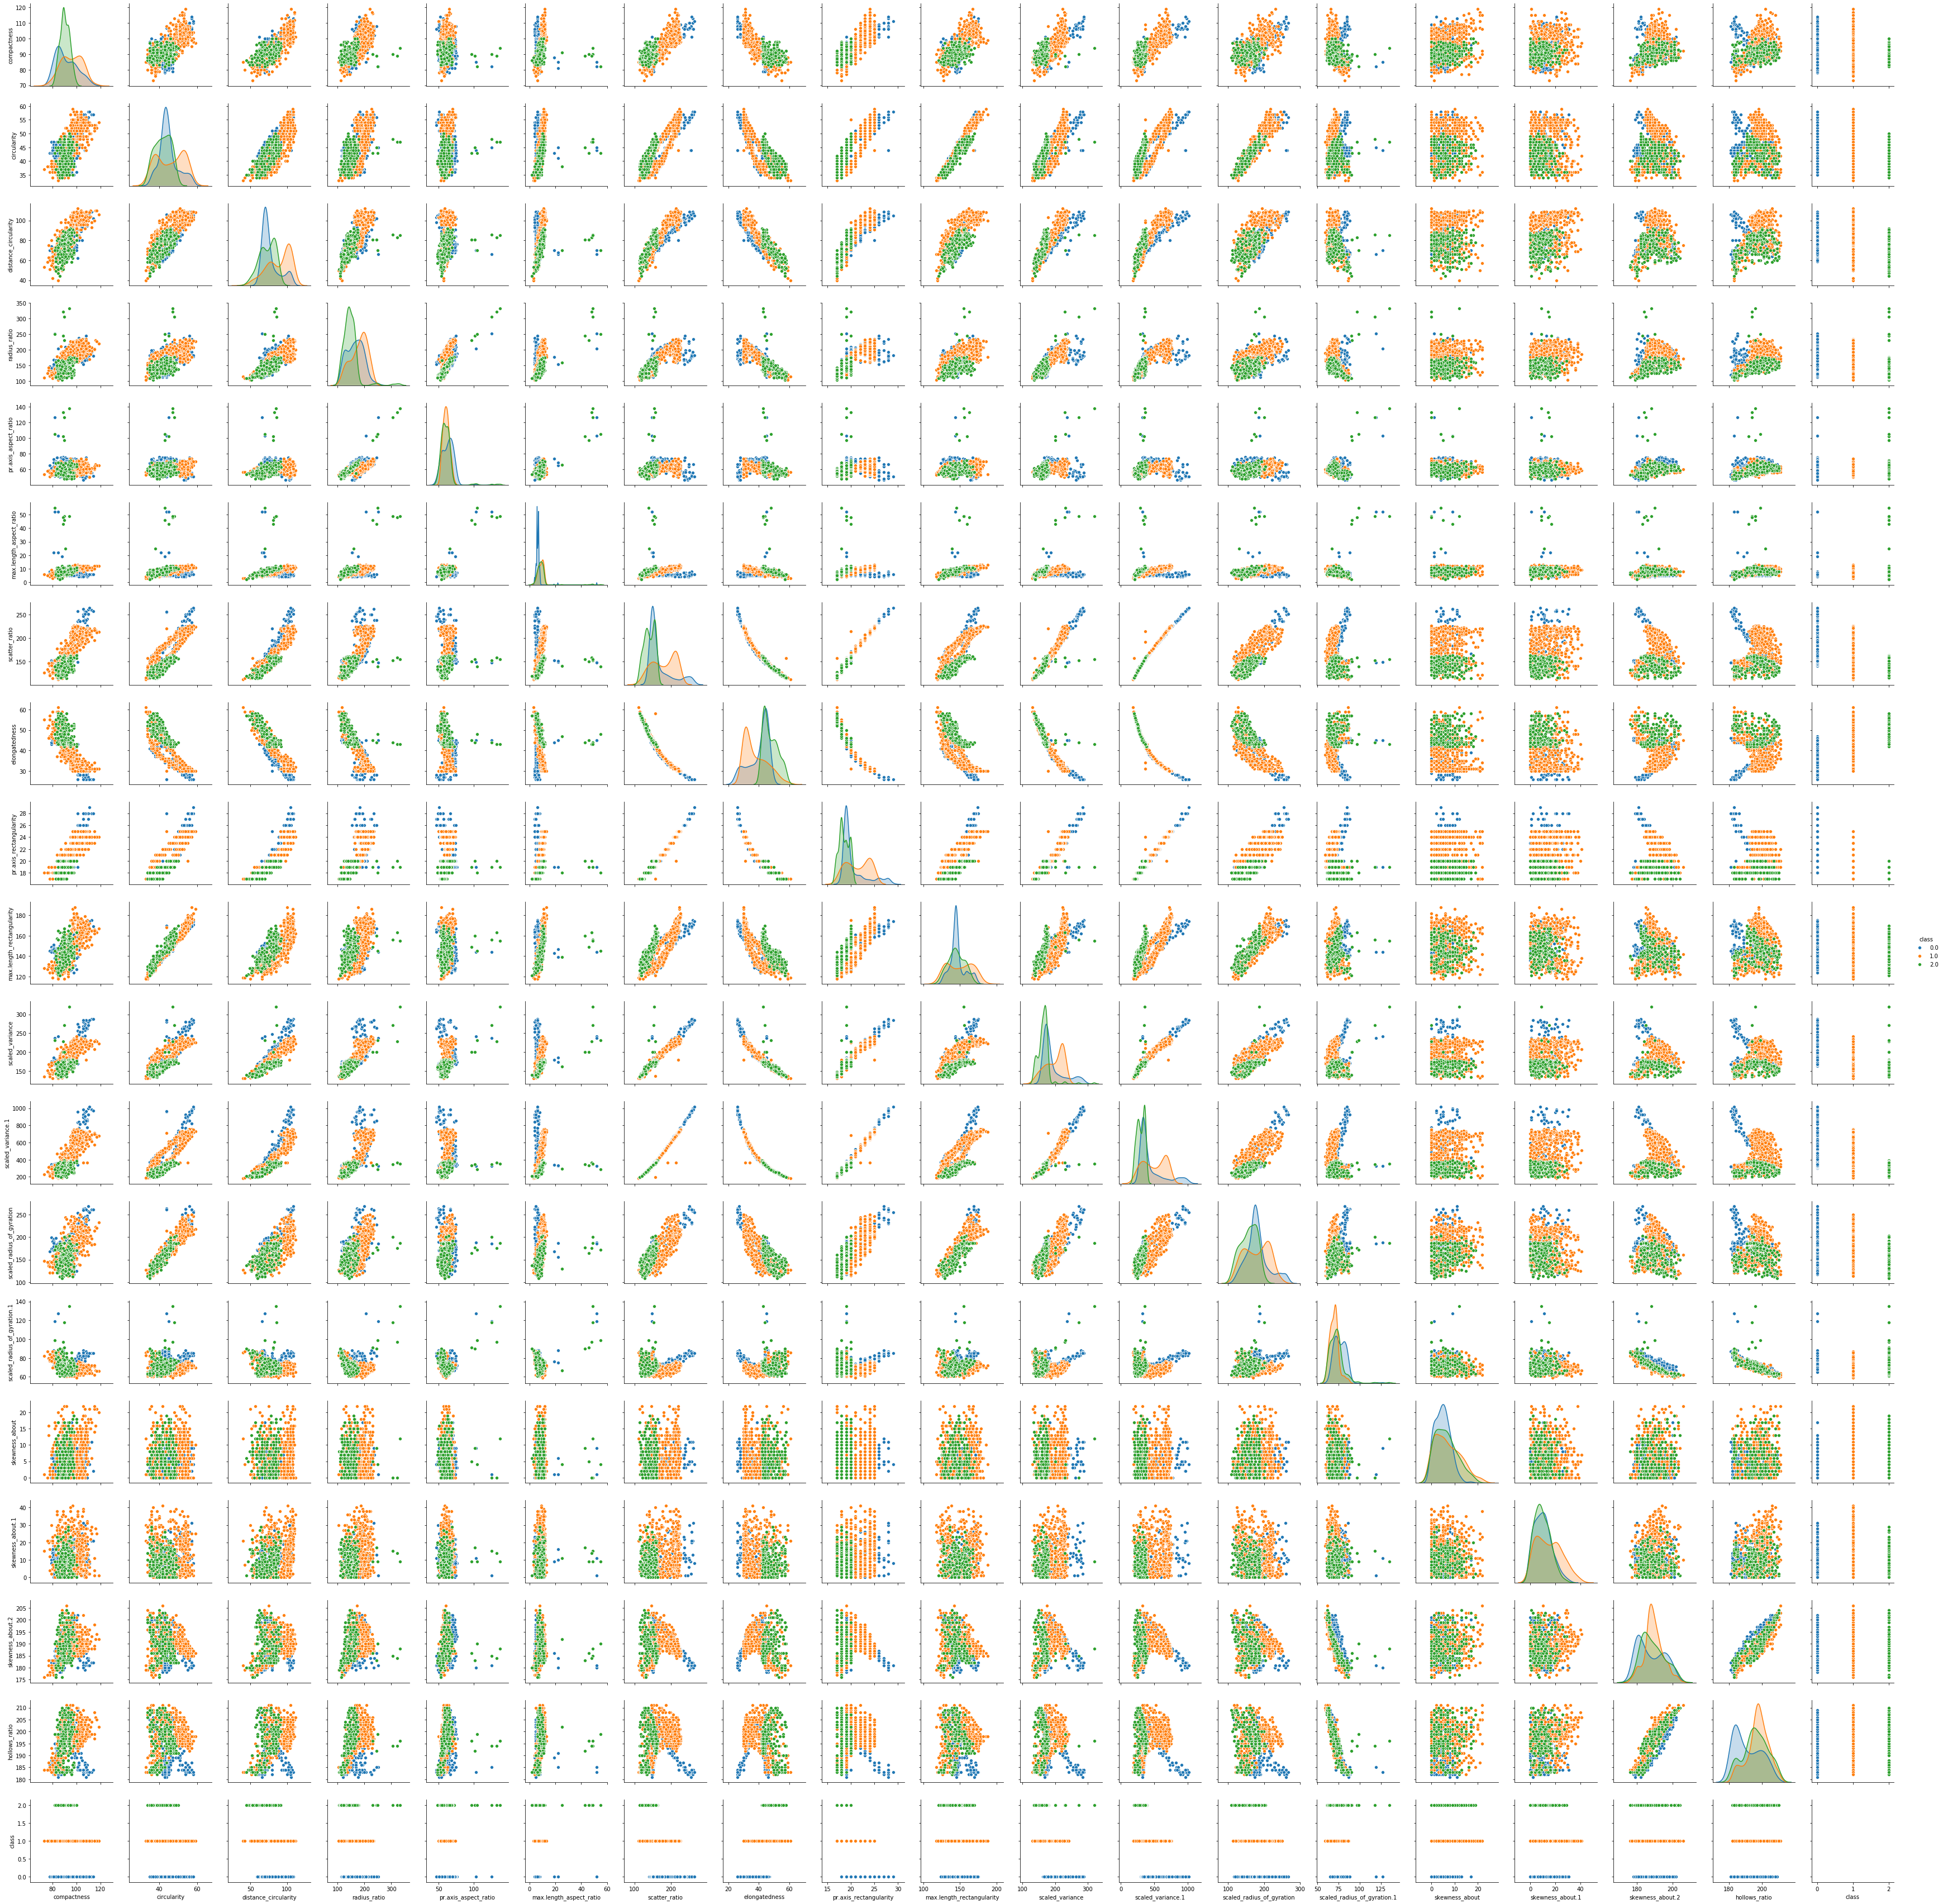

In [31]:
sns.pairplot(newdf,hue='class' ,diag_kind="kde")
plt.show()

Observations:
    
We can see the similar observation from the Correlation heat map, that there are few Attributes which are Highly Positively/Negatively correlated

# 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks) 

As per the above correlation values, from the attribute which has high correlation we can drop any one of the atribute,
and as per analysis we can DROP the below mentioned attributes:      

max.length_rectangularity                       
scaled_radius_of_gyration                        
distance_circularity            
elongatedness                  
pr.axis_rectangularity                 
scaled_variance          
scaled_variance.1 

First let us train the model with the RAW Data and then use the PCA to decide on the dimentionality reduction

In [32]:
#Split our data into train and test data set
seed=12
x=newdf.drop(['class'],axis=1)
y=newdf['class']
x_train_df,x_test_df,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=seed)

In [33]:
x_train_df

compactness  circularity  distance_circularity  radius_ratio  \
832        108.0         49.0                 109.0         204.0   
40          95.0         48.0                 104.0         214.0   
460         90.0         41.0                  62.0         147.0   
113         88.0         35.0                  50.0         121.0   
822         95.0         41.0                  82.0         170.0   
..           ...          ...                   ...           ...   
241         93.0         45.0                  73.0         164.0   
253         94.0         43.0                  68.0         170.0   
390         86.0         42.0                  65.0         113.0   
667        110.0         53.0                 104.0         223.0   
843        106.0         54.0                 101.0         222.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
832                  61.0                     11.0          212.0   
40                   67.0                      9.0          205.0   
460                  60.0                      6.0          128.0   
113                  58.0                      5.0          114.0   
822                  65.0                      9.0          145.0   
..                    ...                      ...            ...   
241                  59.0                      7.0          159.0   
253                  67.0                      6.0          142.0   
390                  50.0                      8.0          152.0   
667                  66.0                     10.0          211.0   
843                  67.0                     12.0          222.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
832           31.0                    24.0                      159.0   
40            32.0                    23.0                      151.0   
460           52.0                    18.0                      141.0   
113           59.0                    17.0                      122.0   
822           46.0                    19.0                      145.0   
..             ...                     ...                        ...   
241           42.0                    20.0                      146.0   
253           46.0                    18.0                      142.0   
390           45.0                    19.0                      141.0   
667           32.0                    24.0                      164.0   
843           30.0                    25.0                      173.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
832            229.0              665.0                      215.0   
40             227.0              628.0                      202.0   
460            149.0              246.0                      157.0   
113            132.0              192.0                      138.0   
822            163.0              314.0                      140.0   
..               ...                ...                        ...   
241            182.0              379.0                      188.0   
253            164.0              310.0                      177.0   
390            169.0              332.0                      171.0   
667            223.0              659.0                      210.0   
843            228.0              721.0                      200.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
832                         71.0            16.0              11.0   
40                          74.0             5.0               9.0   
460                         61.0            13.0               4.0   
113                         74.0            21.0               4.0   
822                         64.0             4.0               8.0   
..                           ...             ...               ...   
241                         65.0            11.0              15.0   
253                         65.0            10.0               8.0   

In [34]:
y_train

832    1.0
40     1.0
460    2.0
113    1.0
822    2.0
      ... 
241    1.0
253    0.0
390    0.0
667    1.0
843    1.0
Name: class, Length: 592, dtype: float64

In [35]:
#Checking the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train_df)/len(newdf)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_df)/len(newdf)) * 100))

69.98% data is in training set
30.02% data is in test set


In [36]:
print("Original class bus Values    : {0} ({1:0.2f}%)".format(len(newdf.loc[newdf['class'] == 0]), (len(newdf.loc[newdf['class'] == 0])/len(newdf)) * 100))
print("Original class car Values   : {0} ({1:0.2f}%)".format(len(newdf.loc[newdf['class'] == 1]), (len(newdf.loc[newdf['class'] == 1])/len(newdf)) * 100))
print("Original class van Values   : {0} ({1:0.2f}%)".format(len(newdf.loc[newdf['class'] == 2]), (len(newdf.loc[newdf['class'] == 2])/len(newdf)) * 100))
print("")
print("Training class bus Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train == 0])/len(y_train)) * 100))
print("Training class car Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train == 1])/len(y_train)) * 100))
print("Training class van Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train == 2])/len(y_train)) * 100))
print("")
print("Test class bus Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test == 0])/len(y_test)) * 100))
print("Test class car Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test == 1])/len(y_test)) * 100))
print("Test class van Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test == 2])/len(y_test)) * 100))
print("")

Original class bus Values    : 218 (25.77%)
Original class car Values   : 429 (50.71%)
Original class van Values   : 199 (23.52%)

Training class bus Values    : 157 (26.52%)
Training class car Values   : 299 (50.51%)
Training class van Values   : 136 (22.97%)

Test class bus Values        : 61 (24.02%)
Test class car Values       : 130 (51.18%)
Test class van Values       : 63 (24.80%)



In [37]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_train_df)
x_train = pd.DataFrame(scaled_df)

In [38]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_test_df)
x_test = pd.DataFrame(scaled_df)

# 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks) 

4a. Linear Support Vector Machine

In [39]:
#Linear Support vector Machine
lsvm = SVC(kernel='linear',random_state=seed)
lsvm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=12,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
print('Train Data Score :',np.round(lsvm.score(x_train, y_train),4))
print('Test Data Score :',np.round(lsvm.score(x_test, y_test),4))

Train Data Score : 0.9713
Test Data Score : 0.9291


In [41]:
#Predict for train set
pred_train = lsvm.predict(x_train)

#Confusion Matrix
lsvm_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
lsvm_cm_train.index.name = "Predicted"
lsvm_cm_train.columns.name = "True"
lsvm_cm_train

True       Bus  Car  Van
Predicted               
Bus        152    7    0
Car          5  289    2
Van          0    3  134

In [42]:
#Predict for test set
pred_test = lsvm.predict(x_test)

#Confusion Matrix
lsvm_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
lsvm_cm_test.index.name = "Predicted"
lsvm_cm_test.columns.name = "True"
lsvm_cm_test

True       Bus  Car  Van
Predicted               
Bus         56    9    2
Car          1  121    2
Van          4    0   59

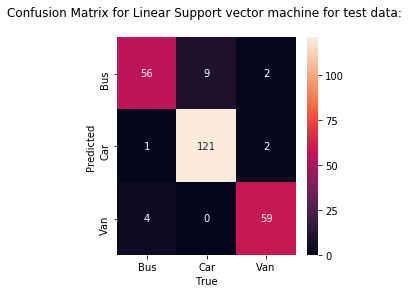

In [43]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Linear Support vector machine for test data: \n")
ax=sns.heatmap(lsvm_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [44]:
#summarize the fit of the model
lsvm_accuracy = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
#lsvm_precision = np.round( metrics.precision_score( y_test, pred_test ,average=None), 4 )
#lsvm_recall    = np.round( metrics.recall_score( y_test, pred_test,average=None ), 4 )
#lsvm_f1score = np.round( metrics.f1_score( y_test, pred_test,average=None ), 4 )
print( 'Total Accuracy : ', lsvm_accuracy)
print('\n') 
print('Metrics Classification Report for linear Support vector machine regression\n',metrics.classification_report(y_test, pred_test))

Total Accuracy :  0.9291


Metrics Classification Report for linear Support vector machine regression
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        61
         1.0       0.98      0.93      0.95       130
         2.0       0.94      0.94      0.94        63

    accuracy                           0.93       254
   macro avg       0.92      0.93      0.92       254
weighted avg       0.93      0.93      0.93       254



4b. Poly Support Vector Machine

In [45]:
psvm = SVC(kernel='poly',random_state=seed,gamma='scale')
psvm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
#Poly Support Vector machine
print('Train Data Score :',np.round(psvm.score(x_train, y_train),4))
print('Test Data Score :',np.round(psvm.score(x_test, y_test),4))

Train Data Score : 0.8345
Test Data Score : 0.8228


In [47]:
#Predict for train set
pred_train = psvm.predict(x_train)

#Confusion Matrix
psvm_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
psvm_cm_train.index.name = "Predicted"
psvm_cm_train.columns.name = "True"
psvm_cm_train

True       Bus  Car  Van
Predicted               
Bus        111    1    0
Car         46  295   48
Van          0    3   88

In [48]:
#Predict for test set
pred_test = psvm.predict(x_test)

#Confusion Matrix
psvm_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
psvm_cm_test.index.name = "Predicted"
psvm_cm_test.columns.name = "True"
psvm_cm_test


True       Bus  Car  Van
Predicted               
Bus         43    3    1
Car         17  127   23
Van          1    0   39

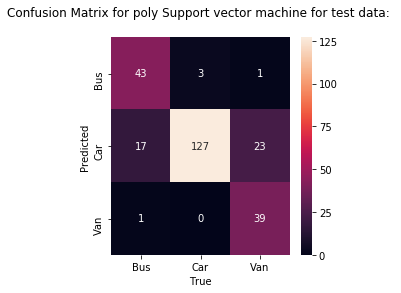

In [49]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for poly Support vector machine for test data: \n")
ax=sns.heatmap(psvm_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [50]:
#summarize the fit of the model
psvm_accuracy = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
#psvm_precision = np.round( metrics.precision_score( y_test, pred_test ,average=None), 4 )
#psvm_recall    = np.round( metrics.recall_score( y_test, pred_test,average=None ), 4 )
#psvm_f1score = np.round( metrics.f1_score( y_test, pred_test,average=None ), 4 )
print( 'Total Accuracy : ', psvm_accuracy)
print('\n') 
print('Metrics Classification Report for poly Support vector machine regression\n',metrics.classification_report(y_test, pred_test))


Total Accuracy :  0.8228


Metrics Classification Report for poly Support vector machine regression
               precision    recall  f1-score   support

         0.0       0.91      0.70      0.80        61
         1.0       0.76      0.98      0.86       130
         2.0       0.97      0.62      0.76        63

    accuracy                           0.82       254
   macro avg       0.88      0.77      0.80       254
weighted avg       0.85      0.82      0.82       254



4c. Radial basis function Support vector machine

In [137]:
rsvm = SVC(kernel='rbf',C=22,random_state=seed,gamma='scale')
rsvm.fit(x_train, y_train)

#rbf Support Vector machine
print('Train Data Score :',np.round(rsvm.score(x_train, y_train),4))
print('Test Data Score :',np.round(rsvm.score(x_test, y_test),4))

Train Data Score : 0.9983
Test Data Score : 0.9764


In [118]:
#rbf Support Vector machine
print('Train Data Score :',np.round(rsvm.score(x_train, y_train),4))
print('Test Data Score :',np.round(rsvm.score(x_test, y_test),4))

Train Data Score : 0.9848
Test Data Score : 0.9567


In [53]:
#Predict for train set
pred_train = rsvm.predict(x_train)

#Confusion Matrix
rsvm_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
rsvm_cm_train.index.name = "Predicted"
rsvm_cm_train.columns.name = "True"
rsvm_cm_train

True       Bus  Car  Van
Predicted               
Bus        156    0    0
Car          0  294    7
Van          1    5  129

In [54]:
#Predict for test set
pred_test = rsvm.predict(x_test)

#Confusion Matrix
rsvm_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
rsvm_cm_test.index.name = "Predicted"
rsvm_cm_test.columns.name = "True"
rsvm_cm_test

True       Bus  Car  Van
Predicted               
Bus         58    5    1
Car          0  124    4
Van          3    1   58

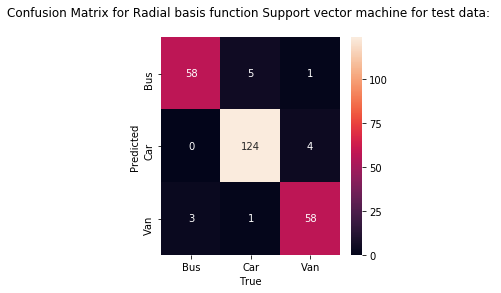

In [55]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Radial basis function Support vector machine for test data: \n")
ax=sns.heatmap(rsvm_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [56]:
#summarize the fit of the model
rsvm_accuracy = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
#rsvm_precision = np.round( metrics.precision_score( y_test, pred_test ,average=None), 4 )
#rsvm_recall    = np.round( metrics.recall_score( y_test, pred_test,average=None ), 4 )
#rsvm_f1score = np.round( metrics.f1_score( y_test, pred_test,average=None ), 4 )
print( 'Total Accuracy : ', rsvm_accuracy)
print('\n') 
print('Metrics Classification Report for Radial basis function Support vector machine regression\n',metrics.classification_report(y_test, pred_test))

Total Accuracy :  0.9449


Metrics Classification Report for Radial basis function Support vector machine regression
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        61
         1.0       0.97      0.95      0.96       130
         2.0       0.94      0.92      0.93        63

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.94      0.95       254



4d. Comparing SVM Accuracy scores for different Kernel 

In [57]:
SVMresult_Before_PCA = pd.DataFrame({'Model' : ['SVM Linear', 'SVM Polynomial', 'SVM RBF'], 
                       'Model Accuracy Before PCA' : [lsvm_accuracy, psvm_accuracy, rsvm_accuracy],
                      })
SVMresult_Before_PCA

Model  Model Accuracy Before PCA
0      SVM Linear                     0.9291
1  SVM Polynomial                     0.8228
2         SVM RBF                     0.9449

Insights:           
From the above results, Radial basis function SVM Model trained using the RAW Data gives the higher Accuracy when compared to the Linear and the Polynomial SVM Model

# 5. Perform K-fold cross validation and get the cross validation score of the model (optional) 

In [58]:
#K fold Cross validation using the K- Fold value as 10, in the Linear SVM Model
kf=KFold(n_splits= 10, random_state = seed)
lsvm_results = cross_val_score(estimator = lsvm, X = x_train, y = y_train, cv = kf)
lsvm_kf_accuracy=lsvm_results.mean()
print(lsvm_kf_accuracy)

0.9594350282485875


In [59]:
#K fold Cross validation in the Polynomial SVM Model
psvm_results = cross_val_score(estimator = psvm, X = x_train, y = y_train, cv = kf)
psvm_kf_accuracy=psvm_results.mean()
print(psvm_kf_accuracy)

0.7887853107344631


In [60]:
#K fold Cross validation in the RBF SVM Model
rsvm_results = cross_val_score(estimator = rsvm, X = x_train, y = y_train, cv = kf)
rsvm_kf_accuracy=rsvm_results.mean()
print(rsvm_kf_accuracy)

0.9644632768361581


In [61]:
Cross_Validation_Score_Before_PCA = pd.DataFrame({'Model' : ['SVM Linear KF', 'SVM Polynomial KF', 'SVM RBF KF'], 
                       ' Cross validation Score Before PCA' : [lsvm_kf_accuracy, psvm_kf_accuracy, rsvm_kf_accuracy],
                      })
Cross_Validation_Score_Before_PCA

Model   Cross validation Score Before PCA
0      SVM Linear KF                            0.959435
1  SVM Polynomial KF                            0.788785
2         SVM RBF KF                            0.964463

Insights:           
From the above results, Radial basis function SVM Model trained using the RAW Data gives the highest Average Accuracy in the K-Fold Validation when compared to the Linear and the Polynomial SVM Model

# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points) 

We will perform PCA in the following steps:          

Split our data into train and test data set            
normalize the training set using standard scalar                  
Calculate the covariance matrix.                
Calculate the eigenvectors and their eigenvalues.                    
Sort the eigenvectors according to their eigenvalues in descending order.                  
Choose the first K eigenvectors (where k is the dimension we'd like to end up with).                  
Build new dataset with reduced dimensionality.               

In [62]:
#Split our data into train and test data set
x_PCA=newdf.drop(['class'],axis=1)
y_PCA=newdf['class']
x_train_df_PCA,x_test_df_PCA,y_train_PCA,y_test_PCA=train_test_split(x_PCA,y_PCA,test_size=0.3,random_state=seed)

In [63]:
scaler = preprocessing.StandardScaler()
scaled_df_PCA = scaler.fit_transform(x_train_df_PCA)
x_train_PCA = pd.DataFrame(scaled_df_PCA)

scaler = preprocessing.StandardScaler()
scaled_df_PCA = scaler.fit_transform(x_test_df_PCA)
x_test_PCA = pd.DataFrame(scaled_df_PCA)

In [64]:
shape=x_train_PCA.shape  #Provides the Shape in (Rows, Columns) in the Data Frame df
print('shape of the data frame is =',shape)

shape of the data frame is = (592, 18)


In [65]:
#Checking the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train_PCA)/len(newdf)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_PCA)/len(newdf)) * 100))

69.98% data is in training set
30.02% data is in test set


In [66]:
#Calculation of CovMatrix
covMatrix = np.cov(x_train_PCA,rowvar=False)
print(covMatrix)

[[ 1.00169205e+00  6.78118442e-01  7.87371455e-01  6.85806823e-01
   6.92936388e-02  1.00953096e-01  8.12907258e-01 -7.95049523e-01
   8.11587938e-01  6.68780927e-01  7.52926433e-01  8.11512959e-01
   5.80048130e-01 -2.59774752e-01  2.71832010e-01  1.58841508e-01
   3.06211489e-01  3.72922061e-01]
 [ 6.78118442e-01  1.00169205e+00  7.99760286e-01  6.15542826e-01
   1.29678979e-01  2.20158986e-01  8.49211771e-01 -8.24341124e-01
   8.47289748e-01  9.63149729e-01  7.93252045e-01  8.34997729e-01
   9.24076826e-01  4.95824276e-02  1.73691433e-01  3.36053851e-03
  -1.11258955e-01  4.25194075e-02]
 [ 7.87371455e-01  7.99760286e-01  1.00169205e+00  7.56615994e-01
   1.29550290e-01  2.16666148e-01  9.08660706e-01 -9.15452254e-01
   8.98752458e-01  7.83870318e-01  8.58688058e-01  8.89413802e-01
   7.18645934e-01 -2.14505126e-01  1.44092169e-01  2.63425998e-01
   1.28155999e-01  3.16384531e-01]
 [ 6.85806823e-01  6.15542826e-01  7.56615994e-01  1.00169205e+00
   6.58070111e-01  4.38253611e-01  7.

In [67]:
pca = PCA(n_components=18,random_state=seed)
pca.fit(x_train_PCA)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=12,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
#The eigen Values
print(pca.explained_variance_)

[9.37585040e+00 2.99653283e+00 2.00920122e+00 1.19332515e+00
 8.87310633e-01 5.35453076e-01 3.37403957e-01 2.13432212e-01
 1.64770725e-01 8.68055727e-02 6.92702647e-02 4.65866062e-02
 3.53583409e-02 2.82378283e-02 2.06158337e-02 1.74482714e-02
 9.06385005e-03 3.79008751e-03]


In [69]:
#The eigen Vectors
print(pca.components_)

[[ 2.74536287e-01  2.94026070e-01  3.05394716e-01  2.64843416e-01
   7.15013070e-02  8.37452609e-02  3.18040672e-01 -3.15146187e-01
   3.15424264e-01  2.84009127e-01  3.08846995e-01  3.14514633e-01
   2.75115280e-01 -1.69724573e-02  5.23991387e-02  5.96087639e-02
   2.54951310e-02  6.92308185e-02]
 [-1.47949616e-01  1.17389406e-01 -7.26374270e-02 -1.69672658e-01
  -7.07376612e-02  5.51863947e-02  4.05006048e-02  1.79072077e-02
   5.21497833e-02  1.11774162e-01  6.80833481e-02  4.55752775e-02
   1.99700319e-01  4.97322113e-01 -8.94426942e-02 -1.28622167e-01
  -5.41988253e-01 -5.41133415e-01]
 [-9.93831675e-02 -3.88666867e-02 -4.98304105e-02  3.01754837e-01
   6.47282191e-01  5.87511000e-01 -9.45024372e-02  5.08028442e-02
  -1.07653230e-01 -3.13509739e-02  6.64071458e-02 -1.04952119e-01
  -5.13461202e-02  2.61018924e-01 -8.56481152e-02 -6.42367319e-02
   5.54557506e-02  7.82093874e-02]
 [ 7.90572123e-02  1.82352789e-01 -6.68141222e-02 -5.35017594e-02
   8.70342653e-03  5.03901918e-02 -9.

In [70]:
#percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.20000712e-01 1.66192840e-01 1.11433739e-01 6.61838553e-02
 4.92117665e-02 2.96971441e-02 1.87130010e-02 1.18373158e-02
 9.13846643e-03 4.81438565e-03 3.84184745e-03 2.58377292e-03
 1.96103411e-03 1.56611829e-03 1.14338942e-03 9.67711000e-04
 5.02696638e-04 2.10204741e-04]


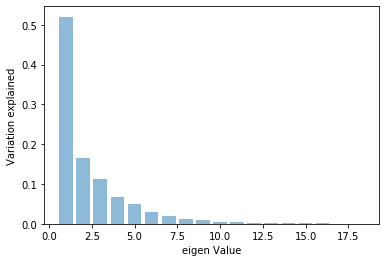

In [71]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

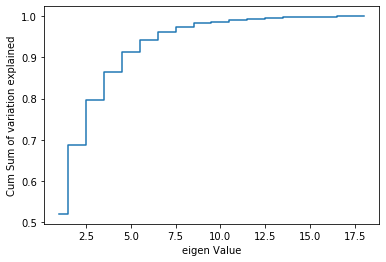

In [72]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum Sum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [73]:
i=1;
while i<19:
    pca = PCA(n_components=i,random_state=seed)
    pca.fit(x_train_PCA)
    print('Principal component of',i,'Captures around ',np.round(pca.explained_variance_ratio_.sum()*100,2),'Percent of Variance in the data')
    i=i+1

Principal component of 1 Captures around  52.0 Percent of Variance in the data
Principal component of 2 Captures around  68.62 Percent of Variance in the data
Principal component of 3 Captures around  79.76 Percent of Variance in the data
Principal component of 4 Captures around  86.38 Percent of Variance in the data
Principal component of 5 Captures around  91.3 Percent of Variance in the data
Principal component of 6 Captures around  94.27 Percent of Variance in the data
Principal component of 7 Captures around  96.14 Percent of Variance in the data
Principal component of 8 Captures around  97.33 Percent of Variance in the data
Principal component of 9 Captures around  98.24 Percent of Variance in the data
Principal component of 10 Captures around  98.72 Percent of Variance in the data
Principal component of 11 Captures around  99.11 Percent of Variance in the data
Principal component of 12 Captures around  99.36 Percent of Variance in the data
Principal component of 13 Captures arou

Insights:            
    For Principal component of 7 the model Captures around more than 95% Percent of Variance in the data, so we decide to use the  Number of component as 7 and create a new dataframe X_Train_pca7

In [74]:
#n_Components=7 capture about 95% of the variance in the data
pca7 = PCA(n_components=7)
pca7.fit(x_train_PCA)
x_train_pca7 = pca7.transform(x_train_PCA)

In [75]:
pd.DataFrame(x_train_pca7)

0         1         2         3         4         5         6
0    4.153559 -0.461787 -0.377833  1.269603  1.050148  0.719166  0.532736
1    2.892276  0.677193  0.459446 -0.334097 -0.661037  0.736421 -0.287379
2   -2.931955 -2.884173 -0.352031  2.145320 -0.056691 -0.286230 -0.350695
3   -5.298825  0.783730 -0.654489  2.463252  1.972778  1.299444 -0.089491
4   -1.478930 -2.644776  0.553585  0.327767 -0.860093 -0.404133  0.389771
..        ...       ...       ...       ...       ...       ...       ...
587 -0.477857 -1.426177 -0.598000  0.786327  0.482010 -0.203356 -0.591645
588 -1.596782 -2.060841  0.287625  1.346413 -0.245488  0.139889 -0.834658
589 -2.573741  2.935482 -0.941954 -0.667610  0.611014 -0.230041  0.359631
590  4.390161 -0.978755  0.093569 -0.251555 -0.374752 -0.203348  0.111492
591  4.696827  0.022194  0.509139  0.261767 -1.407068 -0.244600  0.605138

[592 rows x 7 columns]

In [76]:
#n_Components=7 capture about 95% of the variance in the data, Preparing the PCA Test data set for n=7
pca7 = PCA(n_components=7)
pca7.fit(x_test_PCA)
x_test_pca7 = pca7.transform(x_test_PCA)

In [77]:
pd.DataFrame(x_test_pca7)

0         1         2         3         4         5         6
0   -2.017520  2.175869  1.344064 -0.790433 -0.698341  1.168752 -0.907596
1    7.299035  4.066952 -1.895883  0.578850  0.750181  1.073824  0.432775
2   -3.437859  1.880437 -0.870502  0.963064  0.770652 -1.175937  0.997460
3   -0.912386  0.418286  0.835277 -1.134336 -0.400623  0.703370 -0.966627
4   -1.362233  1.952926  1.497351  0.162725 -0.482447  0.792126 -1.482528
..        ...       ...       ...       ...       ...       ...       ...
249 -4.292902  1.221299 -0.191631  0.536359  1.746521  0.580472 -0.719609
250 -2.336706  2.791264  0.118879  0.814263 -0.145917 -0.324569 -0.244693
251 -1.037658 -1.435544  0.523339  1.071520 -0.192588  0.967556  0.648920
252  0.736928 -1.556748 -1.234512  2.362240  0.692789  0.049824  0.162615
253  5.456700 -0.285561  0.043823  0.472919  1.939759 -0.177646 -0.240331

[254 rows x 7 columns]

# 7.  Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks) 

7a. Train a Support vector machine using the train set and get the accuracy on the test set on the Principal Component

In [78]:
PCA_x_train=x_train_pca7
PCA_y_train=y_train_PCA
PCA_x_test=x_test_pca7
PCA_y_test=y_test_PCA

In [79]:
#Linear Support vector Machine for Principal component
PCA_lsvm = SVC(kernel='linear',random_state=seed)
PCA_lsvm.fit(PCA_x_train,PCA_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=12,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
print('Train Data Score :',np.round(PCA_lsvm.score(PCA_x_train, PCA_y_train),4))
print('Test Data Score :',np.round(PCA_lsvm.score(PCA_x_test, PCA_y_test),4))

Train Data Score : 0.8294
Test Data Score : 0.7362


In [81]:
#Predict for PCA train set
pred_train = PCA_lsvm.predict(PCA_x_train)

#Confusion Matrix
PCA_lsvm_cm_train = pd.DataFrame(confusion_matrix(PCA_y_train,pred_train).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
PCA_lsvm_cm_train.index.name = "Predicted"
PCA_lsvm_cm_train.columns.name = "True"
PCA_lsvm_cm_train

True       Bus  Car  Van
Predicted               
Bus        118   33    6
Car         34  250    7
Van          5   16  123

In [82]:
#Predict for PCA test set
pred_test = PCA_lsvm.predict(PCA_x_test)

#Confusion Matrix
PCA_lsvm_cm_test = pd.DataFrame(confusion_matrix(PCA_y_test,pred_test).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
PCA_lsvm_cm_test.index.name = "Predicted"
PCA_lsvm_cm_test.columns.name = "True"
PCA_lsvm_cm_test

True       Bus  Car  Van
Predicted               
Bus         46   16    6
Car         14  100   16
Van          1   14   41

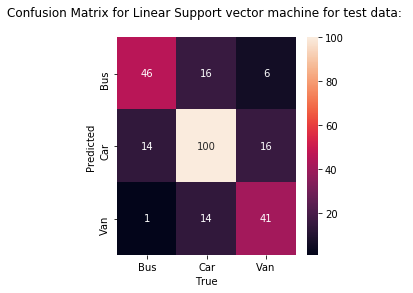

In [83]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Linear Support vector machine for test data: \n")
ax=sns.heatmap(PCA_lsvm_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [84]:
#summarize the fit of the model
PCA_lsvm_accuracy = np.round( metrics.accuracy_score( PCA_y_test, pred_test ), 4 )
#PCA_lsvm_precision = np.round( metrics.precision_score( PCA_y_test, pred_test ,average=None), 4 )
#PCA_lsvm_recall    = np.round( metrics.recall_score( PCA_y_test, pred_test,average=None ), 4 )
#PCA_lsvm_f1score = np.round( metrics.f1_score( PCA_y_test, pred_test,average=None ), 4 )
print( 'Total Accuracy : ', PCA_lsvm_accuracy)
print('\n') 
print('Metrics Classification Report for Linear Support vector machine regression\n',metrics.classification_report(PCA_y_test, pred_test))

Total Accuracy :  0.7362


Metrics Classification Report for Linear Support vector machine regression
               precision    recall  f1-score   support

         0.0       0.68      0.75      0.71        61
         1.0       0.77      0.77      0.77       130
         2.0       0.73      0.65      0.69        63

    accuracy                           0.74       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.74      0.74      0.74       254



In [85]:
#Poly Support vector Machine for Principal component
PCA_psvm = SVC(kernel='poly',gamma='auto',random_state=seed)
PCA_psvm.fit(PCA_x_train,PCA_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
print('Train Data Score :',np.round(PCA_psvm.score(PCA_x_train, PCA_y_train),4))
print('Test Data Score :',np.round(PCA_psvm.score(PCA_x_test, PCA_y_test),4))

Train Data Score : 0.9003
Test Data Score : 0.748


In [87]:
#Predict for PCA train set
pred_train = PCA_psvm.predict(PCA_x_train)

#Confusion Matrix
PCA_psvm_cm_train = pd.DataFrame(confusion_matrix(PCA_y_train,pred_train).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
PCA_psvm_cm_train.index.name = "Predicted"
PCA_psvm_cm_train.columns.name = "True"
PCA_psvm_cm_train

True       Bus  Car  Van
Predicted               
Bus        129    4    0
Car         28  286   18
Van          0    9  118

In [88]:
#Predict for PCA test set
pred_test = PCA_psvm.predict(PCA_x_test)

#Confusion Matrix
PCA_psvm_cm_test = pd.DataFrame(confusion_matrix(PCA_y_test,pred_test).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
PCA_psvm_cm_test.index.name = "Predicted"
PCA_psvm_cm_test.columns.name = "True"
PCA_psvm_cm_test

True       Bus  Car  Van
Predicted               
Bus         40    6    2
Car         20  109   20
Van          1   15   41

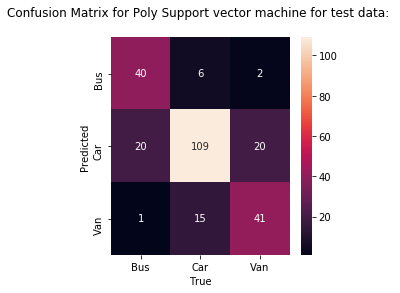

In [89]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Poly Support vector machine for test data: \n")
ax=sns.heatmap(PCA_psvm_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [90]:
#summarize the fit of the model
PCA_psvm_accuracy = np.round( metrics.accuracy_score( PCA_y_test, pred_test ), 4 )
#PCA_psvm_precision = np.round( metrics.precision_score( PCA_y_test, pred_test ,average=None), 4 )
#PCA_psvm_recall    = np.round( metrics.recall_score( PCA_y_test, pred_test,average=None ), 4 )
#PCA_psvm_f1score = np.round( metrics.f1_score( PCA_y_test, pred_test,average=None ), 4 )
print( 'Total Accuracy : ', PCA_psvm_accuracy)
print('\n') 
print('Metrics Classification Report for Poly Support vector machine regression\n',metrics.classification_report(PCA_y_test, pred_test))

Total Accuracy :  0.748


Metrics Classification Report for Poly Support vector machine regression
               precision    recall  f1-score   support

         0.0       0.83      0.66      0.73        61
         1.0       0.73      0.84      0.78       130
         2.0       0.72      0.65      0.68        63

    accuracy                           0.75       254
   macro avg       0.76      0.71      0.73       254
weighted avg       0.75      0.75      0.75       254



In [91]:
#RBF Support vector Machine for Principal component
PCA_rsvm = SVC(kernel='rbf',random_state=seed,gamma='auto')
PCA_rsvm.fit(PCA_x_train,PCA_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [92]:
print('Train Data Score :',np.round(PCA_rsvm.score(PCA_x_train, PCA_y_train),4))
print('Test Data Score :',np.round(PCA_rsvm.score(PCA_x_test, PCA_y_test),4))

Train Data Score : 0.9662
Test Data Score : 0.8268


In [93]:
#Predict for PCA train set
pred_train = PCA_rsvm.predict(PCA_x_train)

#Confusion Matrix
PCA_rsvm_cm_train = pd.DataFrame(confusion_matrix(PCA_y_train,pred_train).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
PCA_rsvm_cm_train.index.name = "Predicted"
PCA_rsvm_cm_train.columns.name = "True"
PCA_rsvm_cm_train

True       Bus  Car  Van
Predicted               
Bus        155    2    0
Car          2  288    7
Van          0    9  129

In [94]:
#Predict for PCA test set
pred_test = PCA_rsvm.predict(PCA_x_test)

#Confusion Matrix
PCA_rsvm_cm_test = pd.DataFrame(confusion_matrix(PCA_y_test,pred_test).T,index=['Bus', 'Car','Van'], columns=['Bus', 'Car','Van'])
PCA_rsvm_cm_test.index.name = "Predicted"
PCA_rsvm_cm_test.columns.name = "True"
PCA_rsvm_cm_test

True       Bus  Car  Van
Predicted               
Bus         55    8    4
Car          4  109   13
Van          2   13   46

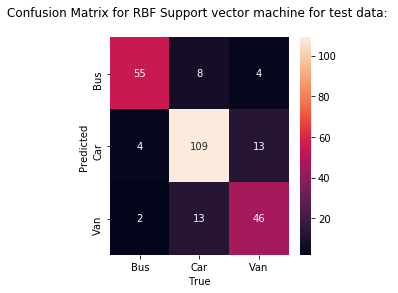

In [95]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for RBF Support vector machine for test data: \n")
ax=sns.heatmap(PCA_rsvm_cm_test, annot=True,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [96]:
#summarize the fit of the model
PCA_rsvm_accuracy = np.round( metrics.accuracy_score( PCA_y_test, pred_test ), 4 )
#PCA_rsvm_precision = np.round( metrics.precision_score( PCA_y_test, pred_test ,average=None), 4 )
#PCA_rsvm_recall    = np.round( metrics.recall_score( PCA_y_test, pred_test,average=None ), 4 )
#PCA_rsvm_f1score = np.round( metrics.f1_score( PCA_y_test, pred_test,average=None ), 4 )
print( 'Total Accuracy : ', PCA_rsvm_accuracy)
print('\n') 
print('Metrics Classification Report for RBF Support vector machine regression\n',metrics.classification_report(PCA_y_test, pred_test))

Total Accuracy :  0.8268


Metrics Classification Report for RBF Support vector machine regression
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        61
         1.0       0.87      0.84      0.85       130
         2.0       0.75      0.73      0.74        63

    accuracy                           0.83       254
   macro avg       0.81      0.82      0.82       254
weighted avg       0.83      0.83      0.83       254



In [97]:
SVMresult_After_PCA = pd.DataFrame({'Model' : ['SVM Linear', 'SVM Polynomial', 'SVM RBF'], 
                       'Model Accuracy After PCA' : [PCA_lsvm_accuracy, PCA_psvm_accuracy, PCA_rsvm_accuracy],
                      })
SVMresult_After_PCA

Model  Model Accuracy After PCA
0      SVM Linear                    0.7362
1  SVM Polynomial                    0.7480
2         SVM RBF                    0.8268

Insights:           
From the above results, Radial basis function SVM Model trained using the Xpca df gives the higher Accuracy when compared to the Linear and the Polynomial SVM Model

7b. Perform K-fold cross validation and get the cross validation score of the model for Principal Component

In [98]:
#K fold Cross validation
PCA_kf=KFold(n_splits= 10, random_state = seed)
PCA_lsvm_results = cross_val_score(estimator = PCA_lsvm, X = PCA_x_train, y = PCA_y_train, cv = PCA_kf)
PCA_lsvm_PCA_kf_accuracy=PCA_lsvm_results.mean()
print(PCA_lsvm_PCA_kf_accuracy)

0.8092372881355934


In [99]:
#K fold Cross validation
PCA_psvm_results = cross_val_score(estimator = PCA_psvm, X = PCA_x_train, y = PCA_y_train, cv = PCA_kf)
PCA_psvm_PCA_kf_accuracy=PCA_psvm_results.mean()
print(PCA_psvm_PCA_kf_accuracy)

0.8597175141242938


In [100]:
#K fold Cross validation
PCA_rsvm_results = cross_val_score(estimator = PCA_rsvm, X = PCA_x_train, y = PCA_y_train, cv = PCA_kf)
PCA_rsvm_PCA_kf_accuracy=PCA_rsvm_results.mean()
print(PCA_rsvm_PCA_kf_accuracy)

0.9138700564971751


In [101]:
Cross_Validation_Score_After_PCA = pd.DataFrame({'Model' : ['SVM Linear KF', 'SVM Polynomial KF', 'SVM RBF KF'], 
                       ' Cross validation Score After PCA' : [PCA_lsvm_PCA_kf_accuracy, PCA_psvm_PCA_kf_accuracy, PCA_rsvm_PCA_kf_accuracy],
                      })
Cross_Validation_Score_After_PCA

Model   Cross validation Score After PCA
0      SVM Linear KF                           0.809237
1  SVM Polynomial KF                           0.859718
2         SVM RBF KF                           0.913870

Insights:            
From the above results, Radial basis function SVM Model trained using the Xpca7 Data gives the highest Average Accuracy in the K-Fold Validation when compared to the Linear and the Polynomial SVM Model

# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points) 

In [102]:
svm_result=pd.merge(SVMresult_Before_PCA, SVMresult_After_PCA,on='Model')

In [103]:
svm_result

Model  Model Accuracy Before PCA  Model Accuracy After PCA
0      SVM Linear                     0.9291                    0.7362
1  SVM Polynomial                     0.8228                    0.7480
2         SVM RBF                     0.9449                    0.8268

From the above results, we can see that the RBF SVM model has higher accuracy when compared to the remaining model.
By reducing the dimensionality from 18 to 7, we have dropped around 11% Percent model accuracy.

In [104]:
Cross_Validation_Score_Result=pd.merge(Cross_Validation_Score_Before_PCA, Cross_Validation_Score_After_PCA,on='Model')

In [105]:
Cross_Validation_Score_Result

Model   Cross validation Score Before PCA  \
0      SVM Linear KF                            0.959435   
1  SVM Polynomial KF                            0.788785   
2         SVM RBF KF                            0.964463   

    Cross validation Score After PCA  
0                           0.809237  
1                           0.859718  
2                           0.913870

From the above Cross validation score results, we can see that the RBF SVM model has highest average accuracy when compared to the remaining model. By reducing the dimensionality from 18 to 7, we see only 4-5% drop in the average accuracy